# Import Library and Data

In [ ]:
# Standard library
import pandas as pd
import numpy as np
import scipy.stats as scs
import joblib

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Modeling Library
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
from sklearn.feature_selection import SelectFromModel, RFE
import pickle
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/Users/huanghsufang/ML/Project/merged_data_energy_pluto.csv', index_col=0)
data

,property_id,nyc_borough_block_and_lot_bbl,city,postal_code,national_median_reference_property_type,largest_property_use_type,largest_property_use_type__gross_floor_area_ft²,year_built,construction_status,number_of_buildings,occupancy,metered_areas_energy,energy_star_score,national_median_energy_star_score,energy_star_certification__eligibility,site_eui_kbtuft²,weather_normalized_site_energy_use_kbtu,weather_normalized_site_electricity_intensity_kwhft²,source_eui_kbtuft²,weather_normalized_source_eui_kbtuft²,national_median_source_eui_kbtuft²,source_energy_use_kbtu,weather_normalized_source_energy_use_kbtu,electricity_use__grid_purchase_kbtu,electricity_use__grid_purchase_kwh,weather_normalized_site_electricity_kwh,percent_of_electricity_that_is_green_power,number_of_active_energy_meters__total,site_energy_use_kbtu,multifamily_housing__government_subsidized_housing,multifamily_housing__gross_floor_area_ft²,multifamily_housing__number_of_bedrooms,multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft,multifamily_housing__number_of_laundry_hookups_in_all_units,multifamily_housing__number_of_laundry_hookups_in_common_areas,multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories,multifamily_housing__total_number_of_residential_living_units,multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft,multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft,multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stories,multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft,multifamily_housing__percent_that_can_be_cooled,multifamily_housing__percent_that_can_be_heated,borough,block,lot,bct2020,bctcb2020,healthcenterdistrict,zonedist1,bldgclass,landuse,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,numbldgs,numfloors,unitsres,unitstotal,ext,proxcode,lottype,assessland,assesstot,builtfar,bbl,latitude,longitude,_merge
0,21205224.0,4006520042,Long Island City,11103.0,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,25000.0,2010.0,Existing,1.0,100.0,Whole Property,71.0,50.0,False,66.7,1758894.6,7.0,112.3,115.4,128.1,2806470.4,2885158.1,603862.9,176982.1,173893.6,0.0,8.0,1666390.8,False,25000.0,30.00,1.20000,0.0,6.0,0.0,25.0,1.00000,0.00000,25.0,1.00000,0.0,100.0,QN,652.0,42.0,4006502.0,4.006502e+10,41.0,R6B,D7,4.0,6690.0,34146.0,4000.0,30146.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,25.0,26.0,N,0.0,5.0,170550.0,1727100.0,5.10,4006520042,40.769008,-73.913395,both
1,2665352.0,1012060001,New York,10025.0,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,260780.0,1970.0,Existing,1.0,100.0,Whole Property,100.0,50.0,False,19.2,5022480.9,4.7,48.2,48.2,114.3,12615136.7,12615136.7,4195161.0,1229531.2,1229531.2,0.0,6.0,5022480.9,False,260780.0,317.00,1.21558,0.0,1.0,208.0,208.0,0.79761,0.79761,0.0,0.00000,0.0,100.0,MN,1206.0,1.0,1017700.0,1.017701e+10,16.0,C1-9,D7,4.0,25177.0,244841.0,33619.0,211222.0,2102.0,0.0,31517.0,0.0,0.0,1.0,30.0,203.0,205.0,N,1.0,3.0,1125000.0,8226000.0,9.72,1012060001,40.790459,-73.968816,both
2,2665400.0,1018320043,New York,10025.0,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,324378.0,1943.0,Existing,1.0,100.0,Whole Property,84.0,50.0,False,66.9,23986513.6,3.9,93.3,98.6,121.4,31096872.8,32851011.0,4380098.1,1283733.2,1283733.2,0.0,3.0,22315905.8,False,324378.0,427.00,1.31636,0.0,1.0,258.0,258.0,0.79537,0.79537,0.0,0.00000,0.0,100.0,MN,1832.0,43.0,1018100.0,1.018101e+10,16.0,R9,D3,3.0,42538.0,349740.0,27200.0,322540.0,20000.0,0.0,7200.0,0.0,0.0,1.0,14.0,247.0,258.0,N,1.0,5.0,900000.0,9938250.0,8.22,1018320043,40.792808,-73.965908,both
3,2665405.0,1001420025,New York,10013.0,Fannie Mae Industry Survey - Multifamily,Multifamily Housing,1039841.0,1975.0,Existing,3.0,100.0,Whole Property,3.0,50.0,False,113.8,134732083.7,6.7,161.3,167.3,100.0,1795

## Data Inspection

TARGET = 'site_energy_use_(kbtu)'

In [ ]:
data.columns

Index(['property_id', 'nyc_borough_block_and_lot_bbl', 'city', 'postal_code',
       'national_median_reference_property_type', 'largest_property_use_type',
       'largest_property_use_type__gross_floor_area_ft²', 'year_built',
       'construction_status', 'number_of_buildings', 'occupancy',
       'metered_areas_energy', 'energy_star_score',
       'national_median_energy_star_score',
       'energy_star_certification__eligibility', 'site_eui_kbtuft²',
       'weather_normalized_site_energy_use_kbtu',
       'weather_normalized_site_electricity_intensity_kwhft²',
       'source_eui_kbtuft²', 'weather_normalized_source_eui_kbtuft²',
       'national_median_source_eui_kbtuft²', 'source_energy_use_kbtu',
       'weather_normalized_source_energy_use_kbtu',
       'electricity_use__grid_purchase_kbtu',
       'electricity_use__grid_purchase_kwh',
       'weather_normalized_site_electricity_kwh',
       'percent_of_electricity_that_is_green_power',
       'number_of_active_energy_meters__

In [ ]:
# Exclude values
data = data[data['site_energy_use_kbtu'] != 0]

In [ ]:
predictor = [
       'borough',
       'largest_property_use_type__gross_floor_area_ft²', 'year_built',
       'number_of_buildings',
       'occupancy',
       'energy_star_score',
       'national_median_energy_star_score',
       'energy_star_certification__eligibility',
       'percent_of_electricity_that_is_green_power',
       'number_of_active_energy_meters__total',
       'multifamily_housing__government_subsidized_housing',
       'multifamily_housing__gross_floor_area_ft²',
       'multifamily_housing__number_of_bedrooms',
       'multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_laundry_hookups_in_all_units',
       'multifamily_housing__number_of_laundry_hookups_in_common_areas',
       'multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories',
       'multifamily_housing__total_number_of_residential_living_units',
       'multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft',
       'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stories',
       'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft',
       'multifamily_housing__percent_that_can_be_cooled',
       'multifamily_housing__percent_that_can_be_heated',
        'zonedist1', 'bldgclass', 'landuse', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'ext', 'proxcode',
       'lottype', 'assessland', 'assesstot', 'builtfar',
]

potential_feature_leakage = [
    'site_eui_kbtuft²',
    'weather_normalized_site_energy_use_kbtu',
    'weather_normalized_site_electricity_intensity_kwhft²',
    'source_eui_kbtuft²', 'weather_normalized_source_eui_kbtuft²',
    'national_median_source_eui_kbtuft²', 'source_energy_use_kbtu',
    'weather_normalized_source_energy_use_kbtu',
    'electricity_use__grid_purchase_kbtu',
    'electricity_use__grid_purchase_kwh',
    'weather_normalized_site_electricity_kwh'
]

target = ['site_energy_use_kbtu']

In [ ]:
# Change data types (since we still have some categorical data in numerical form)
for feature in ['proxcode', 'lottype', 'landuse']:
  data[feature] = data[feature].astype(str)

<Axes: >

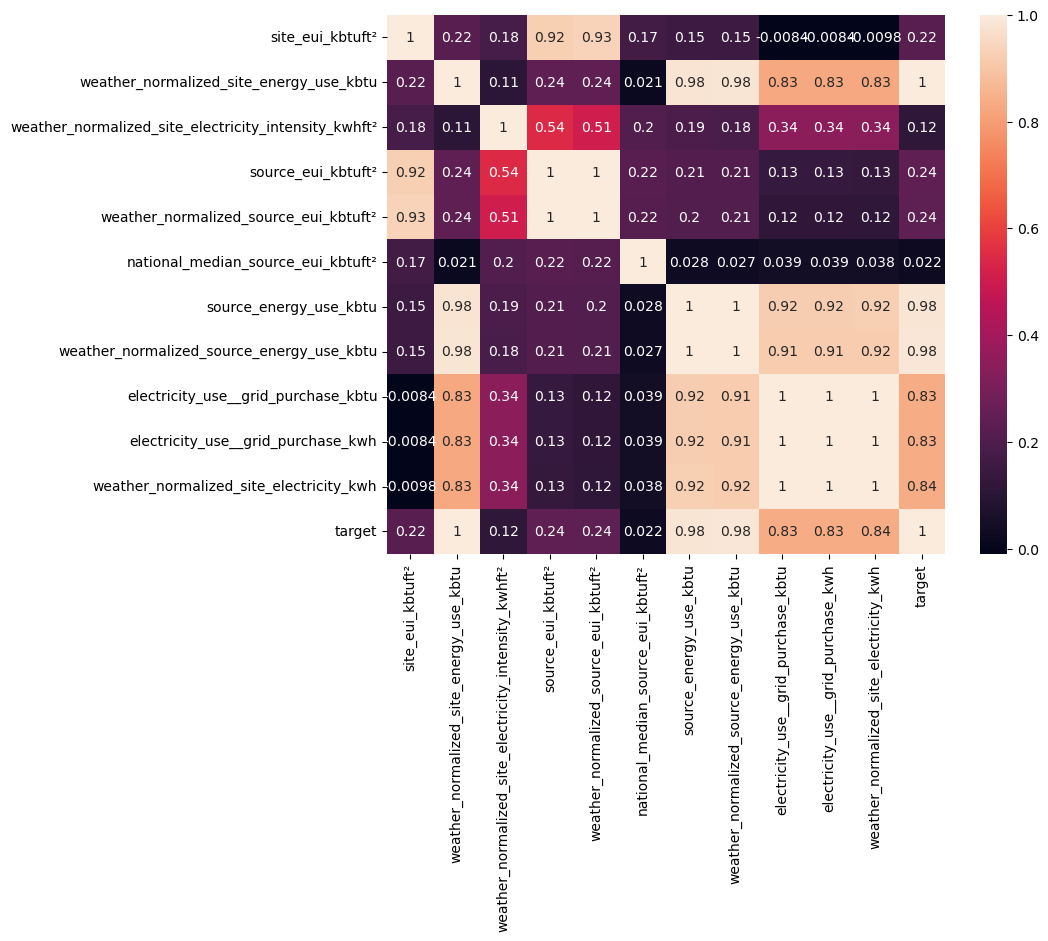

In [ ]:
corr_df = data[potential_feature_leakage]
corr_df['target'] = data['site_energy_use_kbtu']

plt.figure(figsize=(9,7))
sns.heatmap(corr_df.corr(), annot=True, cmap='viridis')

In [ ]:
# Select the column of interest
column = 'site_energy_use_kbtu'

# Calculate z-scores for the selected column
column_z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

# Define a threshold for outliers, typically 3 standard deviations
threshold = 3

# Identify outliers
outliers_mask = column_z_scores > threshold
outliers_df = data[outliers_mask]

outliers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,116.0,5.130717e+06,3.433841e+06,1.443214e+06,2.704624e+06,4.157746e+06,5.804794e+06,2.045447e+07
nyc_borough_block_and_lot_bbl,116.0,1.803911e+09,1.214817e+09,1.000168e+09,1.009780e+09,1.014105e+09,3.030340e+09,5.001960e+09
postal_code,116.0,1.041377e+04,5.998499e+02,1.000100e+04,1.001875e+04,1.003450e+04,1.113325e+04,1.169200e+04
largest_property_use_type__gross_floor_area_ft²,116.0,8.898436e+05,1.169056e+06,1.036250e+05,4.791982e+05,6.763690e+05,8.816230e+05,8.942176e+06
year_built,116.0,1.972241e+03,2.269672e+01,1.904000e+03,1.960000e+03,1.969000e+03,1.985500e+03,2.018000e+03
number_of_buildings,116.0,3.620690e+00,5.929521e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.250000e+00,3.500000e+01
occupancy,116.0,9.905172e+01,2.630407e+00,8.500000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
energy_star_score,116.0,3.041379e+01,2.739282e+01,1.000000e+00,4.000000e+00,2.300000e+01,4.900000e+01,9.700000e+01
national_median_energy_star_score,116.0,5.000000e+01,0.000000e+00,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
site_eui_kbtuft²,116.0,1.413707e+02,1.329310e+02,4.320000e+01,8.357500e+01,1.008000e+02,1.306500e+02,9.053000e+02


In [ ]:
outliers_df.describe(include='object').T

,count,unique,top,freq
city,116,14,New York,63
national_median_reference_property_type,116,1,Fannie Mae Industry Survey - Multifamily,116
largest_property_use_type,116,1,Multifamily Housing,116
construction_status,116,1,Existing,116
metered_areas_energy,116,1,Whole Property,116
borough,116,5,MN,77
zonedist1,116,27,R6,18
bldgclass,116,11,D4,35
landuse,116,3,4.0,57
ext,116,5,N,75


# Split Data

In [ ]:
# Split to X y
X = data[predictor]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#X.info()

In [ ]:
# Display X_Train
X_train.sample(10, random_state=1)

,borough,largest_property_use_type__gross_floor_area_ft²,year_built,number_of_buildings,occupancy,energy_star_score,national_median_energy_star_score,energy_star_certification__eligibility,percent_of_electricity_that_is_green_power,number_of_active_energy_meters__total,multifamily_housing__government_subsidized_housing,multifamily_housing__gross_floor_area_ft²,multifamily_housing__number_of_bedrooms,multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft,multifamily_housing__number_of_laundry_hookups_in_all_units,multifamily_housing__number_of_laundry_hookups_in_common_areas,multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories,multifamily_housing__total_number_of_residential_living_units,multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft,multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft,multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stories,multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft,multifamily_housing__percent_that_can_be_cooled,multifamily_housing__percent_that_can_be_heated,zonedist1,bldgclass,landuse,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,numbldgs,numfloors,unitsres,unitstotal,ext,proxcode,lottype,assessland,assesstot,builtfar
2914,BX,58000.0,1963.0,1.0,100.0,66.0,50.0,False,0.0,4.0,False,58000.0,95.0,1.63793,0.0,6.0,0.0,59.0,1.01724,0.00000,59.0,1.01724,90.0,100.0,R6,D1,3.0,14625.0,58000.0,0.0,58000.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,59.0,59.0,N,1.0,5.0,197550.0,2062350.0,3.97
3509,BK,194158.0,2020.0,1.0,100.0,93.0,50.0,False,0.0,12.0,False,194158.0,221.0,1.13825,28.0,0.0,0.0,135.0,0.69531,0.00000,135.0,0.69531,100.0,100.0,R6,RM,4.0,57630.0,234287.0,42661.0,191626.0,0.0,42661.0,0.0,0.0,0.0,1.0,5.0,135.0,137.0,0,0.0,0.0,2074500.0,15822900.0,4.07
7379,BK,53013.0,1926.0,1.0,90.0,54.0,50.0,False,0.0,10.0,False,53013.0,75.0,1.41475,0.0,5.0,0.0,55.0,1.03748,0.00000,0.0,0.00000,80.0,90.0,R5B,C7,4.0,15000.0,45500.0,2900.0,42600.0,0.0,2900.0,0.0,0.0,0.0,2.0,4.0,50.0,55.0,N,0.0,3.0,238500.0,1292400.0,3.03
931,MN,95007.0,1950.0,1.0,100.0,38.0,50.0,False,0.0,8.0,False,95007.0,90.0,0.94730,12.0,11.0,14.0,76.0,0.79994,0.14736,34.0,0.35787,100.0,100.0,R8B,D4,3.0,12821.0,89840.0,2150.0,87690.0,2150.0,0.0,0.0,0.0,0.0,1.0,11.0,73.0,76.0,N,3.0,5.0,1255500.0,7783200.0,7.01
7285,BK,57228.0,1930.0,1.0,95.0,34.0,50.0,False,0.0,7.0,False,57228.0,77.0,1.34550,0.0,0.0,0.0,66.0,1.15328,0.00000,66.0,1.15328,90.0,90.0,C4-2A,D7,4.0,14665.0,57228.0,4215.0,53013.0,0.0,4215.0,0.0,0.0,0.0,1.0,6.0,65.0,73.0,E,3.0,3.0,297000.0,3159900.0,3.90
3716,BX,55350.0,1925.0,1.0,100.0,41.0,50.0,False,0.0,5.0,True,55350.0,108.0,1.95122,0.0,14.0,0.0,49.0,0.88528,0.00000,49.0,0.88528,90.0,100.0,R8,C1,2.0,15000.0,55350.0,0.0,55350.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,49.0,49.0,N,0.0,3.0,67500.0,2307600.0,3.69
7815,MN,71005.0,1940.0,1.0,100.0,81.0,50.0,True,0.0,5.0,False,71005.0,90.0,1.26752,12.0,4.0,0.0,72.0,1.01401,0.00000,72.0,1.01401,0.0,100.0,R8B,D4,3.0,19948.0,71000.0,0.0,71000.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,70.0,70.0,N,2.0,5.0,1201500.0,6170850.0,3.56
2015,BK,47080.0,1931.0,1.0,100.0,57.0,50.0,False,0.0,3.0,False,47080.0,47.0,0.99830,0.0,0.0,0.0,47.0,0.99830,0.00000,0.0,0.00000,90.0,100.0,R6A,C1,2.0,10710.0,44000.0,0.0,44000.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,47.0,47.0,N,0.0,3.0,168750.0,1165050.0,4.11
1923,QN,38220.0,1929.0,1.0,100.0,89.0,50.0,False,0.0,6.0,False,38220.0,100.0,2.61643,0.0,4.0,0.0,60.0,1.56986,0.00000,60.0,1.56986,90.0,100.0,R5,C1,2.0,12200.0,35720.0,0.0,35720.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,60.0,60.0,N,0.0,5.0,439200.0,1974150.0,2.93
5262,MN,109233.0,1920.0,1.0,100.0,100.0,50.0,False,0.0,9.0,False,109233.0,79.0,0.72322,7.0,0.0,0.0,68.0,0.62252,0.00000,68.0,0.62252,100.0,100.0,R8,R4,3.0,36290.0,172822.0,49353.0,123469.0,0.0,0.0,49353.0,0.0,0.0,2.0,6.0,133.0,135.0,0,0.0

# Preprocessing (Transform, Scaling, One Hot Encoding)

In [ ]:
# Printing all categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns.to_list()

print("Categorical columns:")
for category_column in categorical_features:
    print(f'- {category_column}')

Categorical columns:
- borough
- zonedist1
- bldgclass
- landuse
- ext
- proxcode
- lottype


In [ ]:
# Printing all numerical columns
numerical_features = X_train.select_dtypes(include=['number']).columns.to_list()

print("Categorical columns:")
for num_column in numerical_features:
    print(f'- {num_column}')

Categorical columns:
- largest_property_use_type__gross_floor_area_ft²
- year_built
- number_of_buildings
- occupancy
- energy_star_score
- national_median_energy_star_score
- percent_of_electricity_that_is_green_power
- number_of_active_energy_meters__total
- multifamily_housing__gross_floor_area_ft²
- multifamily_housing__number_of_bedrooms
- multifamily_housing__number_of_bedrooms_density_number_per_1000_sq_ft
- multifamily_housing__number_of_laundry_hookups_in_all_units
- multifamily_housing__number_of_laundry_hookups_in_common_areas
- multifamily_housing__number_of_residential_living_units_in_a_highrise_building_10_or_more_stories
- multifamily_housing__total_number_of_residential_living_units
- multifamily_housing__total_number_of_residential_living_units_density_number_per_1000_sq_ft
- multifamily_housing__number_of_residential_living_units_in_a_highrise_building_density_number_per_1000_sq_ft
- multifamily_housing__number_of_residential_living_units_in_a_midrise_building_59_stor

In [ ]:
# Check number of unique value
for cat_column in categorical_features:
  print(f'{cat_column} = {X_train[cat_column].nunique()}')

borough = 5
zonedist1 = 133
bldgclass = 48
landuse = 7
ext = 5
proxcode = 4
lottype = 8


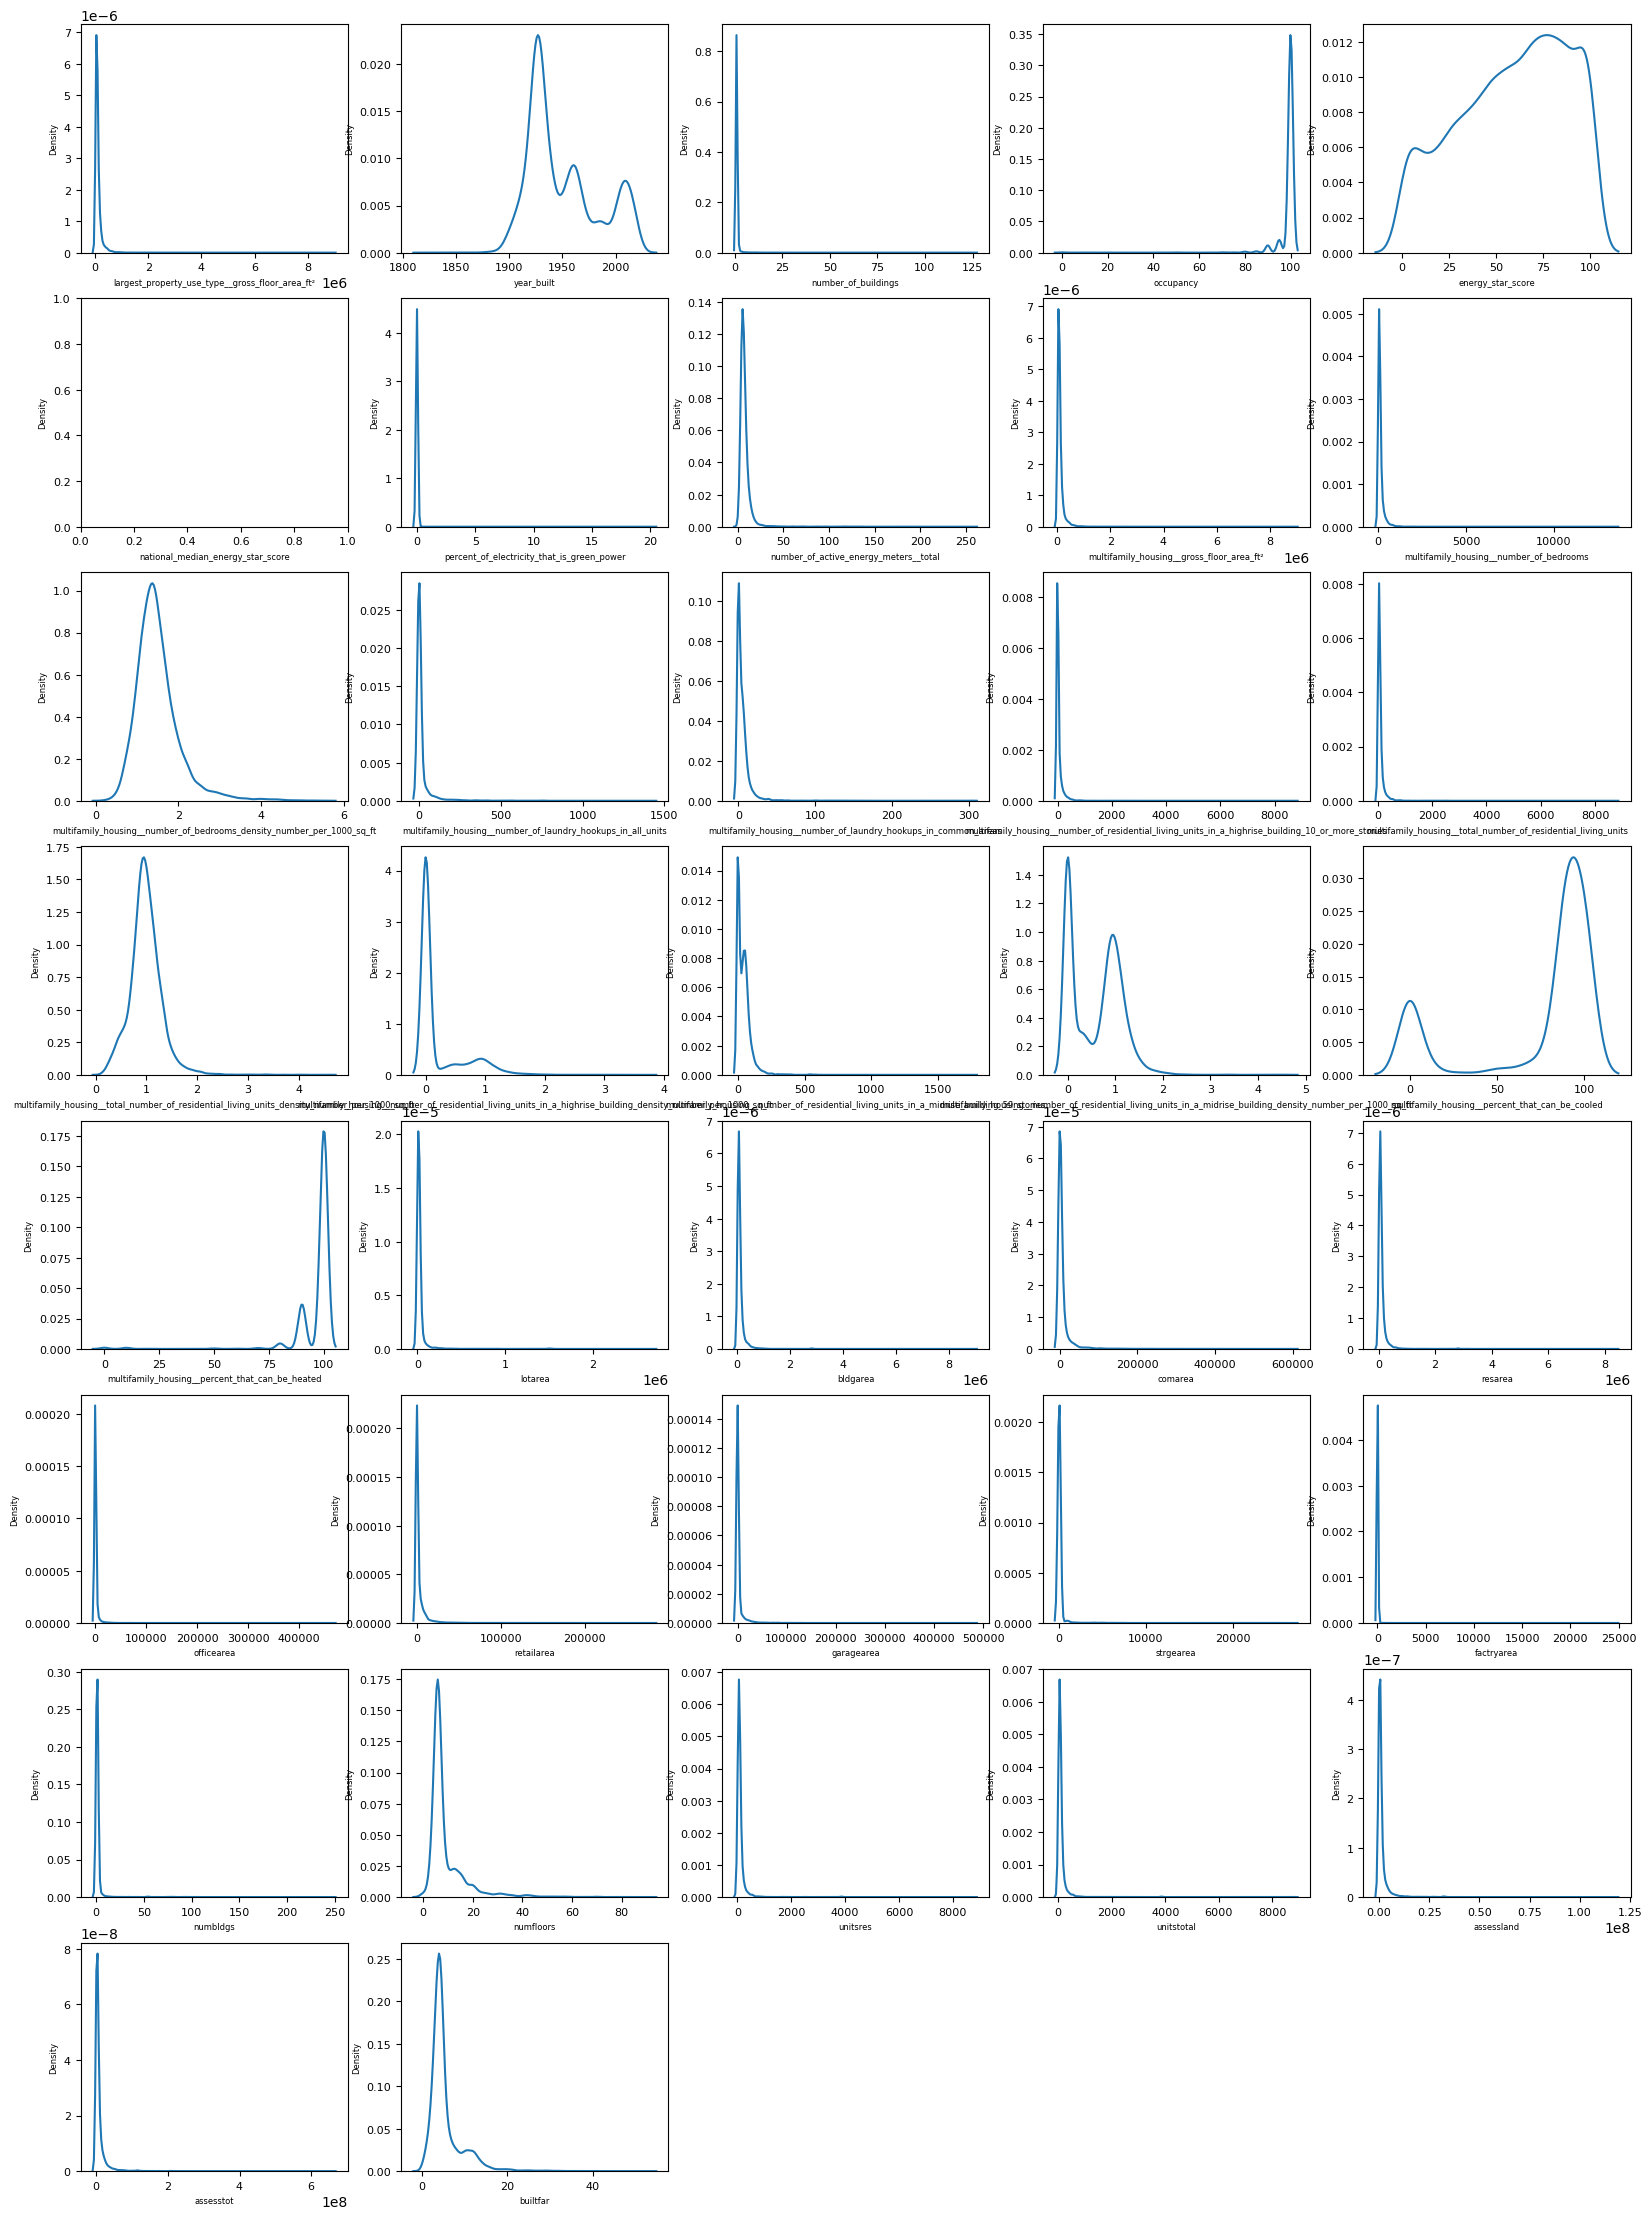

In [ ]:
# Plot to see each numerical variables distribution
plt.figure(figsize = (20, 35))

for i in range(len(numerical_features)):
    plt.subplot(10, 5, i+1)
    sns.kdeplot(data=X_train, x=X_train[numerical_features[i]])

    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    plt.xlabel(numerical_features[i], fontsize=6)
    plt.ylabel('Density', fontsize=6)

In [ ]:
# Make pipeline for categorical features
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value='missing')),
    ('onehot encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Make pipeline for numerical features
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Column Transformer
transformer = ColumnTransformer([
    ('cat pipe', cat_transformer, categorical_features),
    ('num pipe', num_transformer, numerical_features)],
    remainder = 'passthrough'
)

In [ ]:
# Define model pipeline
modelpipe = Pipeline(steps=[
    ('transformer', transformer),
    ('svm', SVR(kernel='linear', C=1, gamma='auto'))
])

In [ ]:
modelpipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot '
                                                                   'encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['borough', 'zonedist1',
                                                   'bldgclass', 'landuse',
                                                   'ext', 'proxcode',
                                                   'lottype']),
                                                 ('num pipe',
                                                  Pipeline(steps=[('impu...
                                                   'multifamily_housing__number_of_residential_living_units_in_a_midrise_building_density_number_per_1000_sq_ft',
                                                   'multifamily_housing__percent_that_can_be_cooled',
                                                   'multifamily_housing__percent_that_can_be_heated',
                                                   'lotarea', 'bldgarea',
                                                   'comarea', 'resarea',
                                                   'officearea', 'retailarea',
                                                   'garagearea', 'strgearea',
                                                   'factryarea', ...])])),
                ('svm', SVR(C=1, gamma='auto', kernel='linear'))])

In [ ]:
# Cross validation
kfold = KFold(n_splits=5, random_state=2023, shuffle=True)
score = cross_val_score(modelpipe, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_percentage_error')
-score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/huanghsufang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/huanghsufang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/huanghsufang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/huanghsufang/anaconda3/lib/python3.11/site-packages/sklearn/utils/valid

array([0.80421007, 0.70688485, 0.77001723, 0.75717125, 0.84750691])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6369 entries, 420 to 7398
Data columns (total 46 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   borough                                                                                                       6369 non-null   object 
 1   largest_property_use_type__gross_floor_area_ft²                                                               6369 non-null   float64
 2   year_built                                                                                                    6369 non-null   float64
 3   number_of_buildings                                                                                           6369 non-null   float64
 4   occupancy                                           

(0.0, 1.0)

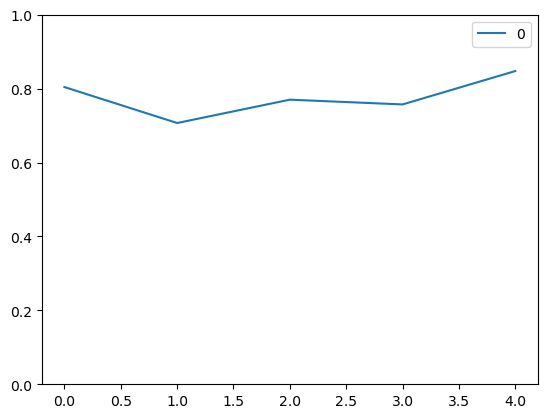

In [ ]:
# Plot result
df_score = pd.DataFrame(-score)
sns.lineplot(data=pd.DataFrame(df_score))
plt.ylim(0, 1)

In [ ]:
# Fit and predict
modelpipe.fit(X_train, y_train)
y_train_pred = modelpipe.predict(X_train)
y_test_pred = modelpipe.predict(X_test)

In [ ]:
# Evaluate the model using training data
mse_train = mse(y_train, y_train_pred)
mae_train = mae(y_train, y_train_pred)
mape_train = mape(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print('RMSE:', rmse_train, '\nMSE:', mse_train, '\nMAE:', mae_train, '\nMAPE:', mape_train)

RMSE: 10072140.47784866 
MSE: 101448013805517.44 
MAE: 4133068.6292065047 
MAPE: 0.7853107485196347


In [ ]:
# Evaluate the model using test data
mse_test = mse(y_test, y_test_pred)
mae_test = mae(y_test, y_test_pred)
mape_test = mape(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print('RMSE:', rmse_test, '\nMSE:', mse_test, '\nMAE:', mae_test, '\nMAPE:', mape_test)

RMSE: 9637137.953508876 
MSE: 92874427934961.25 
MAE: 4066975.7725176984 
MAPE: 1.0472320458110365


We have 5 categorical columns and 53 numerical columns. To decide what treatment to implement on the features, we hvae to see first the data distribution.

# Fit, Cross-Validation, and Evaluation

In [ ]:
rf = RandomForestRegressor()

# Feature Selection

# Hyperparameter Tuning